In [1]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()

#print(iris)

In [2]:
#Pflanzendaten x: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]
x = iris["data"]
#Ergebnis/Pflanzentyp y: 1 falls Iris-virginica, ansonsten 0
y = (iris["target"] == 2).astype(np.int) 

#Aufteilen in Test- und Trainingsdaten
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0) 

In [3]:
#Durchführen der logistischen Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
print(log_reg.predict(np.array([[4.8,2.5,5.3,2.4]]))[0])
print(log_reg.predict_proba([[4.80000000, 2.50000000, 5.30000000, 2.40000000]]))

1
[[0.03230917 0.96769083]]


In [5]:
#Ja, es ist zu 97% eine Iris-virginica

In [6]:
#Genauigkeit der logistischen Regression
score = log_reg.score(x_test, y_test)
print(score)

0.9736842105263158


[0]
[[0.96762366 0.03237634]]


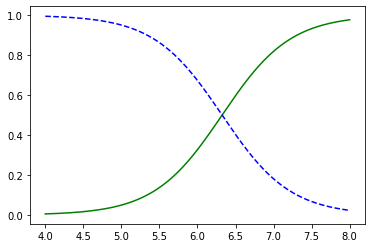

[0]
[[0.5933503 0.4066497]]


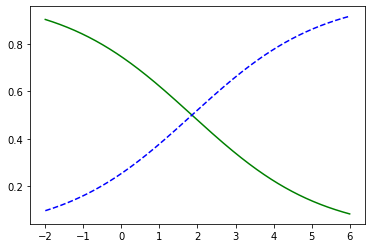

[1]
[[0.17910091 0.82089909]]


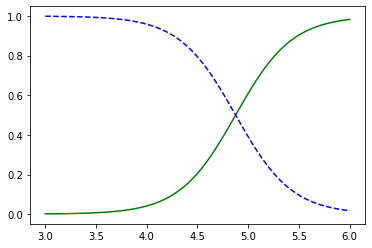

[1]
[[0.03898943 0.96101057]]


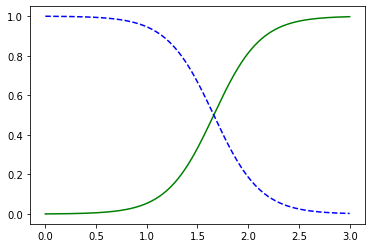

In [7]:
#Einzelne Wahrscheinlichkeiten:

#Pflanzendaten x: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]
x_sl = iris["data"][:, :-3]
x_sw = iris["data"][:, 1:-2]
x_pl = iris["data"][:, 2:-1]
x_pw = iris["data"][:, 3:]

log_reg.fit(x_sl, y)
print(log_reg.predict([[4.8]]))
print(log_reg.predict_proba([[4.80000000]]))

x_new = np.linspace(4, 8, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(x_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.show()

log_reg.fit(x_sw, y)
print(log_reg.predict([[2.5]]))
print(log_reg.predict_proba([[2.50000000]]))

x_new = np.linspace(-2, 6, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(x_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.show()

log_reg.fit(x_pl, y)
print(log_reg.predict([[5.3]]))
print(log_reg.predict_proba([[5.30000000]]))

x_new = np.linspace(3, 6, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(x_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.show()

log_reg.fit(x_pw, y)
print(log_reg.predict([[2.4]]))
print(log_reg.predict_proba([[2.40000000]]))

x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(x_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.show()



In [8]:
#Die Länge und Breite des Blütenblattes deutet darauf hin, dass es sich mit sehr hoher Wahrscheinlichkeit um eine Virginica handelt (82% bzw. 96% Wahrscheinlichkeit)
#Das Kelchblatt hingegen ist viel zu kurz für eine Virginica (3% Wahrscheinlichkeit) und etwas zu breit (41% Wahrscheinlichkeit)

#Wenn ich die vier Wahrscheinlichkeiten zusammenzähle und durch 4 teile erhalte ich eine Gesamtwahrscheinlichkeit von ca. 55%, dass es sich hier um eine Virginica handelt.

#Frage:
#Kann man das mit der Gesamtwahrscheinlichkeit überhaupt so berechenen? Unter [4] wird eine Gesamtwahrscheinlichkeit von ca. 97% ausgegeben.
#Ist die untere oder die obere Berechnung falsch? Oder stimmen beide, da die obere Regression gleich alle Daten gebündelt betrachtet? Bin hier gerade etwas ratlos :(